# Notebook 01: Problem Statement & Exploratory Data Analysis

**Student Name:** [Your Name]

**Dataset:** [Your Dataset Name]

**Checkpoints:**
- Checkpoint 1 (Due Feb 1): Sections 1-3
- Checkpoint 2 (Due Feb 8): Sections 4-6

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before each checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll see text cells asking you to explain your decisions, observations, and reasoning. **These written reflections are a critical part of your grade.** 

Don't just write one-word answers or skip these sections. Your reflections demonstrate:
- Your understanding of the data science process
- Your ability to communicate findings to stakeholders
- Your critical thinking about data quality and feature importance

Take time to write thoughtful, complete responses. This is what separates a good data scientist from someone who just runs code!

---

## Setup

Run this cell first to import all necessary libraries.

In [84]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---

# CHECKPOINT 1 (Due: Feb 1)

---

## Section 1: Problem Statement

### 1.1 What are you trying to predict?

*Clearly state your target variable and what it represents.*

**Your answer:**

I am trying to predict exam score since it represents the aggragate of several of the other columns

---

### 1.2 Why does this prediction matter?

*Who would care about this prediction? What decisions could be made with it?*

**Your answer:**

This prediction would matter to a lot of different people.  It could be used by students to improve their study habits.  It could be used by faculty to make changes to their curriculum.  It could even be used by scholorship committee's to decide who is worthy of them.  

---

### 1.3 What features might help predict the target?

*Based on your intuition and domain knowledge, what columns do you think will be most important?*

**Your answer:**

While the vast majority are beneficial, There are some that will help predict the target more than others.  The most will be age, study hours, class attendance, sleep hours, and exam difficulty.  However, i think gender, course, sleep_quality, study method and facility rating could play a part as well although some of these could be biased or faulty.   

## Section 2: Dataset Overview

### 2.1 Load Your Data

In [85]:
# Load your dataset
# Update the path to match your file name
df = pd.read_csv('../data/raw/Exam_Score_Prediction.csv')

# Display basic info
print(f"Dataset shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())

Dataset shape: 20,000 rows, 13 columns

Column names:
['student_id', 'age', 'gender', 'course', 'study_hours', 'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty', 'exam_score']


In [86]:
# TODO: View the first 5 rows of your dataframe
#
# Hint: Use .head()

# YOUR CODE HERE:
df.head(5)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [87]:
# TODO: View the last 5 rows of your dataframe
#
# Hint: Use .tail()

# YOUR CODE HERE:
df.tail(5)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0
19999,20001,20,male,b.sc,7.50,47.9,yes,7.5,poor,coaching,medium,moderate,71.0


### 2.2 Data Types and Info

In [88]:
# TODO: Display info about your dataframe (data types, non-null counts)
#
# Hint: Use .info()

# YOUR CODE HERE:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  str    
 3   course            20000 non-null  str    
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  str    
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  str    
 9   study_method      20000 non-null  str    
 10  facility_rating   20000 non-null  str    
 11  exam_difficulty   20000 non-null  str    
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), str(7)
memory usage: 2.0 MB


In [89]:
# TODO: Get summary statistics for numerical columns
#
# Hint: Use .describe()

# YOUR CODE HERE:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [90]:
# TODO: Get summary statistics for categorical columns
#
# Hint: Use .describe(include='object')

# YOUR CODE HERE:
df.describe(include='object')

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,20000,20000,20000,20000,20000,20000,20000
unique,3,7,2,3,5,3,3
top,other,bca,yes,average,self-study,medium,moderate
freq,6726,2902,16988,6694,4079,6760,9878


### 2.3 Dataset Description

*After looking at the data above, describe your dataset in your own words.*

**Questions to answer:**
- Where did this data come from? (Kaggle link, source)
- What does each row represent?
- How many features do you have?
- What types of features do you have? (numerical, categorical)

**Your description:**

- Where did this data come from? https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset
- What does each row represent? each row represents a unique student
- How many features do you have? potentially 11, but will likely be pared down
- What types of features do you have? i have 4 numerical and 7 categorical, although some categorical ones could be easily converted into numerical due to being a yes/no style.  

## Section 3: Initial EDA

### 3.1 Target Variable Analysis

In [91]:
# Define your target variable
TARGET = 'exam_score'  # <-- UPDATE THIS!

# Basic statistics of target
print(f"Target Variable: {TARGET}")
print(f"\nBasic Statistics:")
print(df[TARGET].describe())

Target Variable: exam_score

Basic Statistics:
count    20000.000000
mean        62.513225
std         18.908491
min         19.599000
25%         48.800000
50%         62.600000
75%         76.300000
max        100.000000
Name: exam_score, dtype: float64


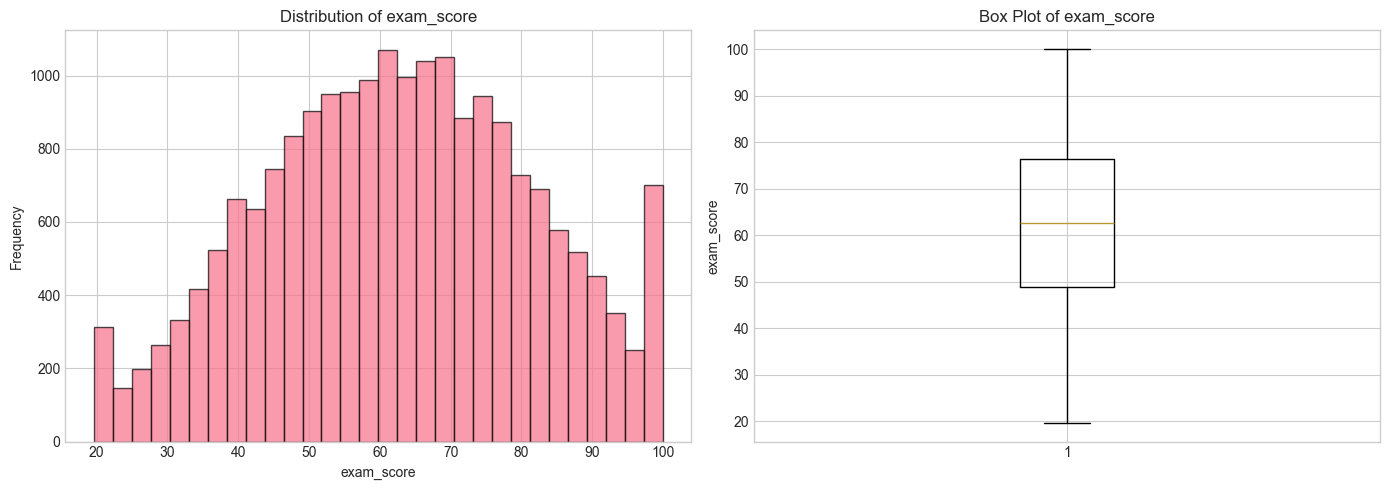


Skewness: -0.05
→ Target is approximately symmetric.


In [92]:
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[TARGET].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel(TARGET)
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of {TARGET}')

# Box plot
axes[1].boxplot(df[TARGET].dropna())
axes[1].set_ylabel(TARGET)
axes[1].set_title(f'Box Plot of {TARGET}')

plt.tight_layout()
plt.show()

# Check skewness
skewness = df[TARGET].skew()
print(f"\nSkewness: {skewness:.2f}")
if abs(skewness) > 1:
    print("→ Target is highly skewed. Consider log transform in feature engineering.")
elif abs(skewness) > 0.5:
    print("→ Target is moderately skewed.")
else:
    print("→ Target is approximately symmetric.")

### 3.2 Data Quality Checks

In [93]:
# TODO: Check for duplicate rows in your dataframe
#
# Steps:
# 1. Count how many duplicate rows exist using df.duplicated().sum()
# 2. Print the count and the percentage of duplicates
#
# Expected output format:
# "Duplicate rows: X,XXX (X.XX%)"

# YOUR CODE HERE:

#gets the number of duplicated values and the percentages
duplicates = df.duplicated().sum()
percentage = duplicates / df.shape[0]

#prints it
print(f'duplicate rows: {duplicates} ({percentage}%)')

duplicate rows: 0 (0.0%)


In [94]:
# TODO: Create a summary of missing values
#
# Steps:
# 1. Calculate missing count for each column: df.isnull().sum()
# 2. Calculate missing percentage: (df.isnull().sum() / len(df)) * 100
# 3. Create a DataFrame with 'Missing Count' and 'Missing %' columns
# 4. Sort by 'Missing %' descending
# 5. Display only columns that have missing values
#
# Hint: You can create a DataFrame with pd.DataFrame({'col1': series1, 'col2': series2})

# YOUR CODE HERE:

#calculates the sum of missing by each column
missing_by_column = df.isnull().sum()

#calculates the percentage of each
missing_percentage = (df.isnull().sum() / len(df)) * 100

#creates the dataframe
df_results = pd.DataFrame({'missing count': missing_by_column, 'missing %': missing_percentage})

#sorts it my missing percentage
df_results_sorted = df_results.sort_values(by='missing %', ascending=False)

#filters for only missing values and displays it
missing_df = df_results_sorted[df_results_sorted['missing count'] > 0]

print(missing_df)

Empty DataFrame
Columns: [missing count, missing %]
Index: []


In [95]:
# Visualize missing values (if any)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    colors = ['red' if pct > 50 else 'orange' if pct > 20 else 'steelblue' 
              for pct in missing_cols['Missing %']]
    plt.barh(missing_cols.index, missing_cols['Missing %'], color=colors)
    plt.xlabel('Missing Percentage')
    plt.title('Missing Values by Column')
    plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Recommendation
    high_missing = missing_cols[missing_cols['Missing %'] > 50]
    if len(high_missing) > 0:
        print(f"\n⚠️ Columns with >50% missing (consider dropping): {high_missing.index.tolist()}")
else:
    print("✓ No missing values in the dataset!")

✓ No missing values in the dataset!


### 3.3 Initial Observations

*Based on your initial exploration, what do you notice?*



**Questions to consider:**
- Is your target variable normally distributed or skewed?
- Are there any obvious outliers in the target?
- How much missing data do you have to deal with?
- Are there any duplicate rows?
- Any surprises or interesting findings?

**Your observations:**

- Is your target variable normally distributed or skewed? it is a normal bell curve except for the highest and lowest scores
- Are there any obvious outliers in the target? there are 2 outliers for the scores, a large low score and a large high score
- How much missing data do you have to deal with? there is no missing data
- Are there any duplicate rows? there are no duplicate rows
- Any surprises or interesting findings? no, while the the 2 outliers look unusual the fact that the target variable are grades is expected

---

## ✅ Checkpoint 1 Submission Instructions

**Congratulations!** You've completed Checkpoint 1. Before moving on, let's commit your work and submit.

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub
Open your terminal and run these commands:

```bash
# Navigate to your project folder (if not already there)
cd path/to/your/capstone-project

# Stage your notebook and data
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/raw/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 1: Problem statement and initial EDA"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 1 assignment on Canvas
2. Submit the link to your GitHub repository
3. Make sure your repo shows your latest commit!

### Step 4: Continue to Checkpoint 2
Now proceed to **Section 4** below to continue with your complete EDA, data cleaning, and feature engineering.

---

---

# CHECKPOINT 2 (Due: Feb 8)

---

## Section 4: Complete EDA

### 4.1 Numerical Features Analysis

In [96]:
# TODO: Get a list of numerical columns (excluding the target)
#
# Steps:
# 1. Use df.select_dtypes(include=[np.number]) to get numerical columns
# 2. Get the column names as a list with .columns.tolist()
# 3. Remove TARGET from the list if it's in there
# 4. Print the count and list of numerical features
#
# Store result in: numerical_cols


# YOUR CODE HERE:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

numerical_cols.remove('exam_score')

print(f"Number of numerical features: {len(numerical_cols)}")
print("Numerical features:")
print(numerical_cols)

Number of numerical features: 5
Numerical features:
['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours']


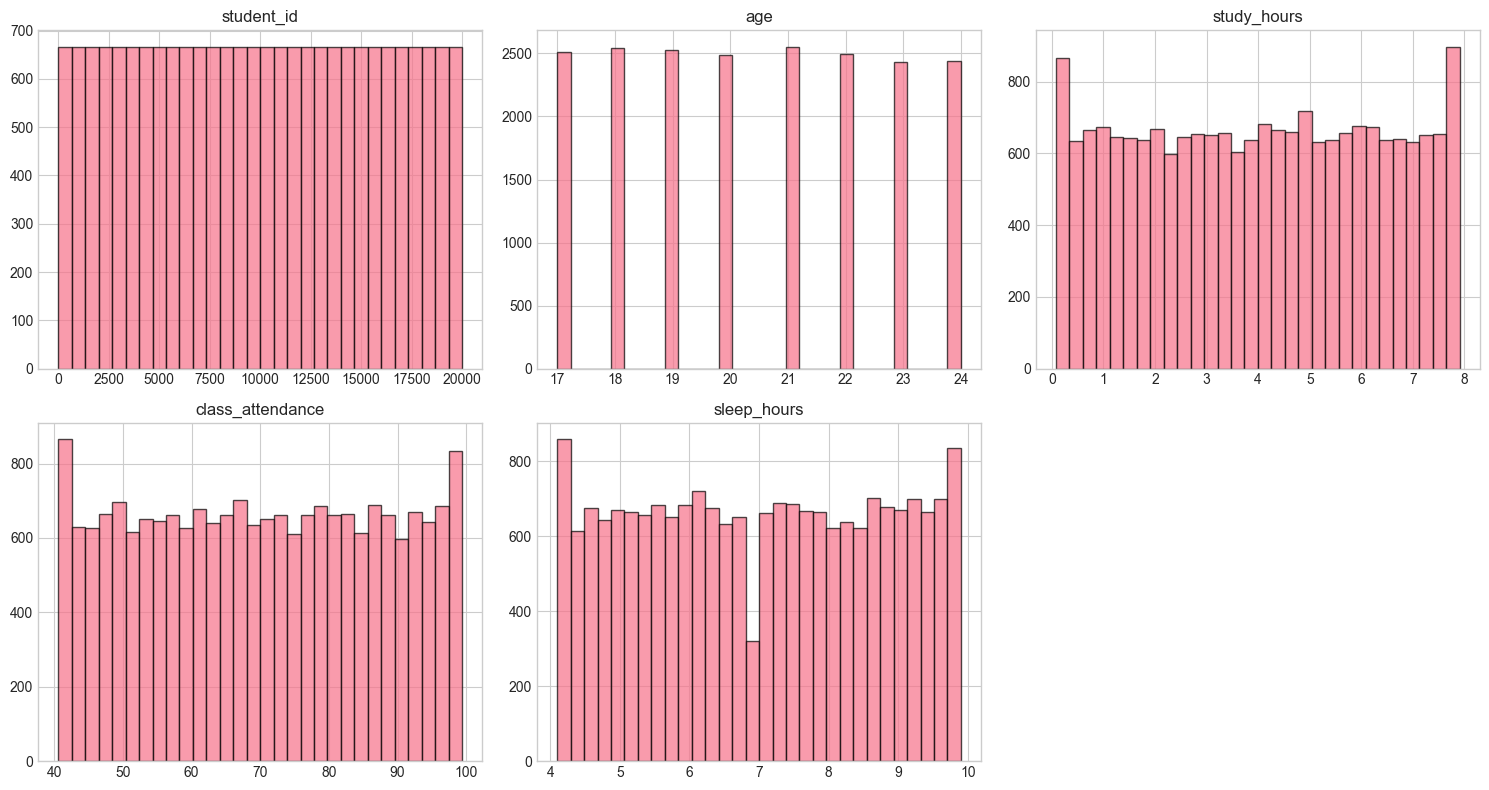

In [97]:
# Distribution of numerical features
if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel('')

    # Hide empty subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found (besides target).")

### 4.2 Categorical Features Analysis

In [98]:
# TODO: Get a list of categorical columns and explore their values
#
# Steps:
# 1. Use df.select_dtypes(include=['object', 'category']) to get categorical columns
# 2. Get the column names as a list
# 3. Print the count and list of categorical features
# 4. For each categorical column, print:
#    - Number of unique values: df[col].nunique()
#    - Top 10 value counts: df[col].value_counts().head(10)
#
# Store result in: categorical_cols

# YOUR CODE HERE:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Number of categorical features: {len(categorical_cols)}")
print("Categorical features:")
print(categorical_cols)


for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Top 10 value counts:")
    print(df[col].value_counts().head(10))

Number of categorical features: 7
Categorical features:
['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']

Column: gender
Number of unique values: 3
Top 10 value counts:
gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

Column: course
Number of unique values: 7
Top 10 value counts:
course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64

Column: internet_access
Number of unique values: 2
Top 10 value counts:
internet_access
yes    16988
no      3012
Name: count, dtype: int64

Column: sleep_quality
Number of unique values: 3
Top 10 value counts:
sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64

Column: study_method
Number of unique values: 5
Top 10 value counts:
study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed      

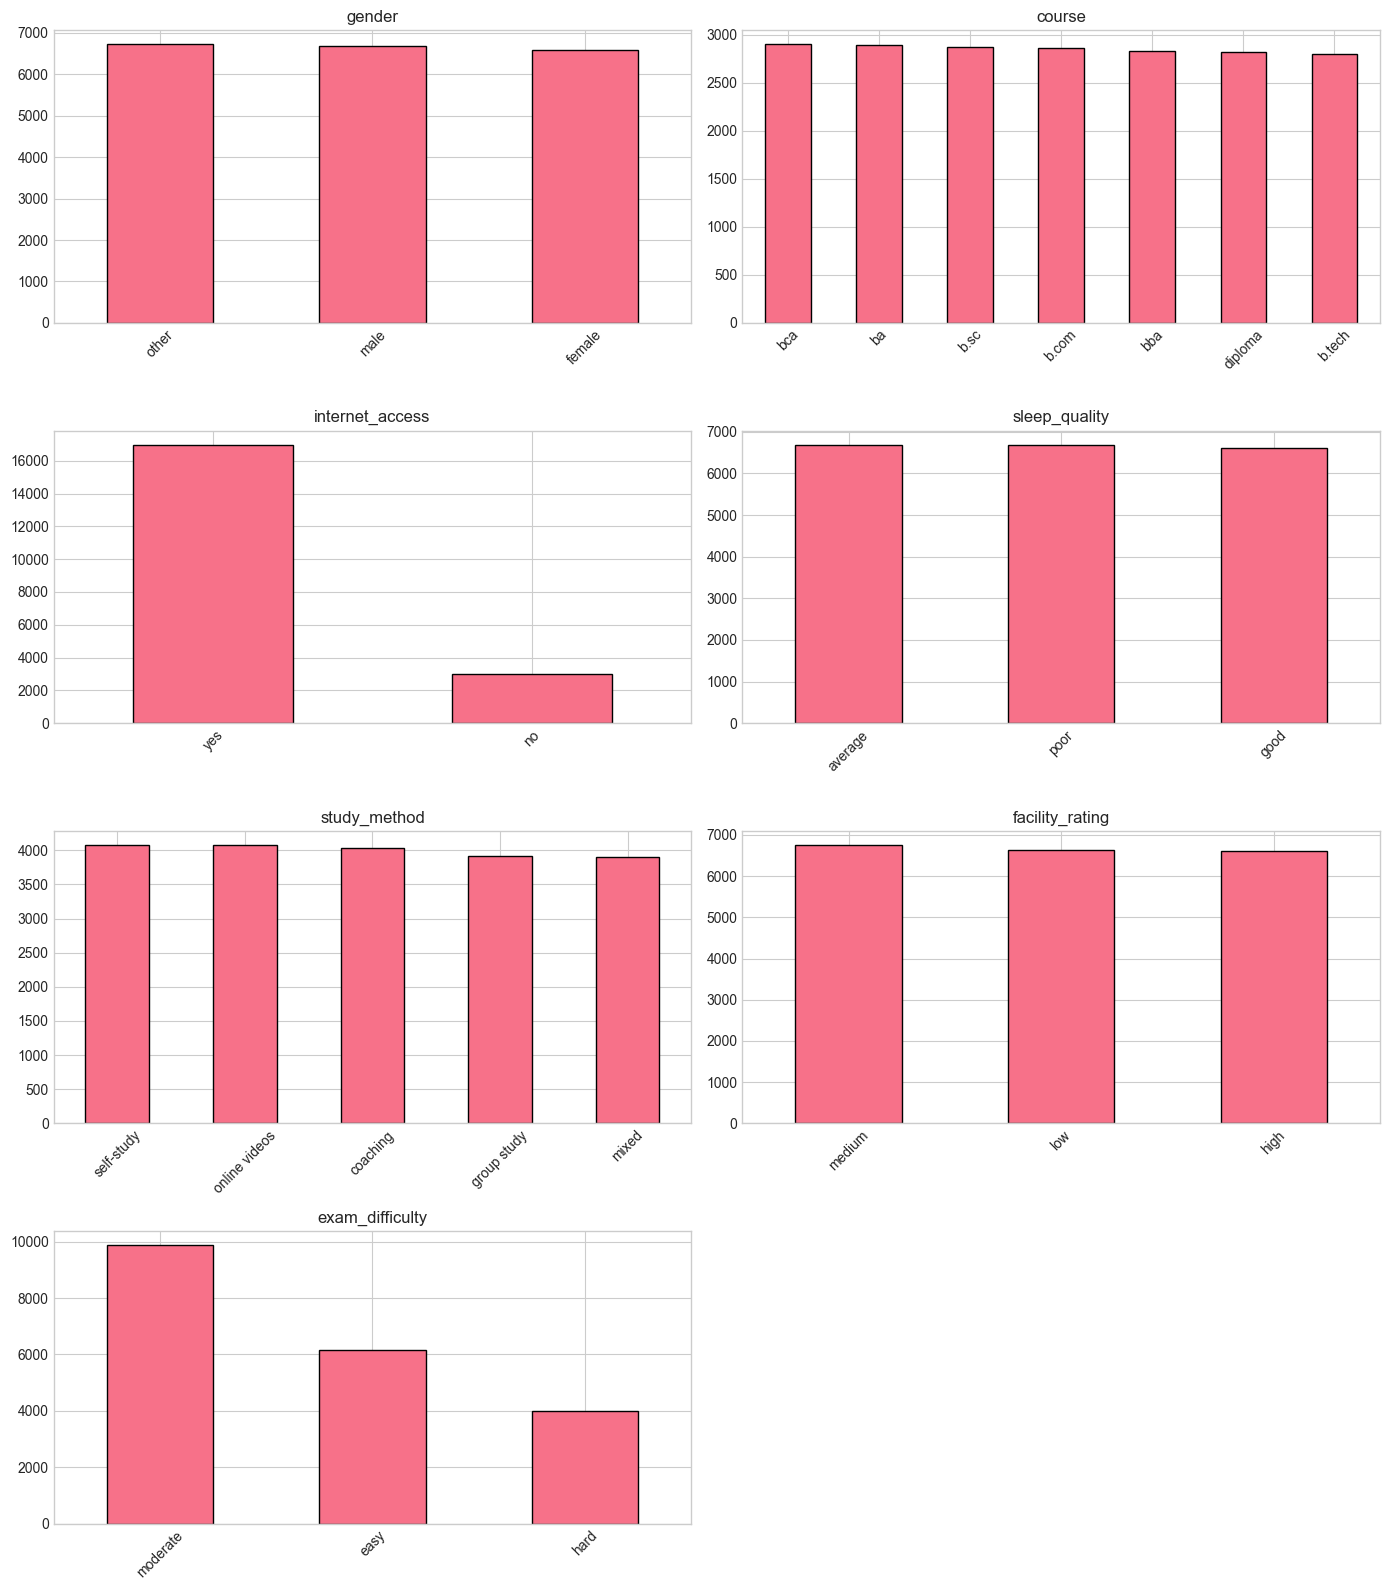

In [99]:
# Visualize categorical features (for columns with reasonable number of categories)
cat_cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 10]

if cat_cols_to_plot:
    n_cols = 2
    n_rows = (len(cat_cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if len(cat_cols_to_plot) == 1 else axes
    
    for i, col in enumerate(cat_cols_to_plot):
        df[col].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for j in range(len(cat_cols_to_plot), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns with ≤10 unique values to plot.")

### 4.3 Categorical Features vs Target

*How does the target variable differ across categories?*

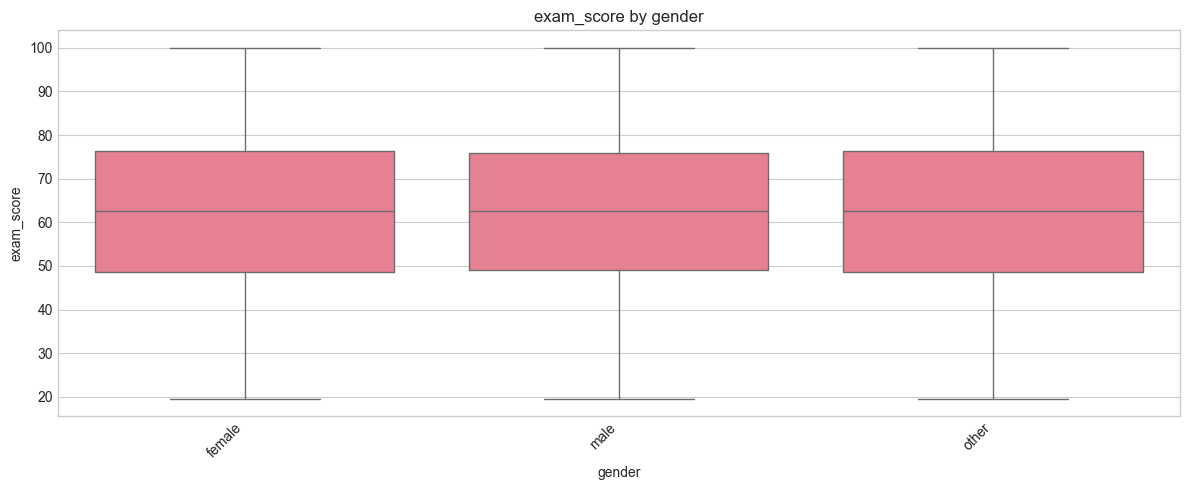


Mean exam_score by gender:
             mean  median  count
gender                          
female  62.582145    62.6   6579
other   62.561023    62.6   6726
male    62.397480    62.6   6695



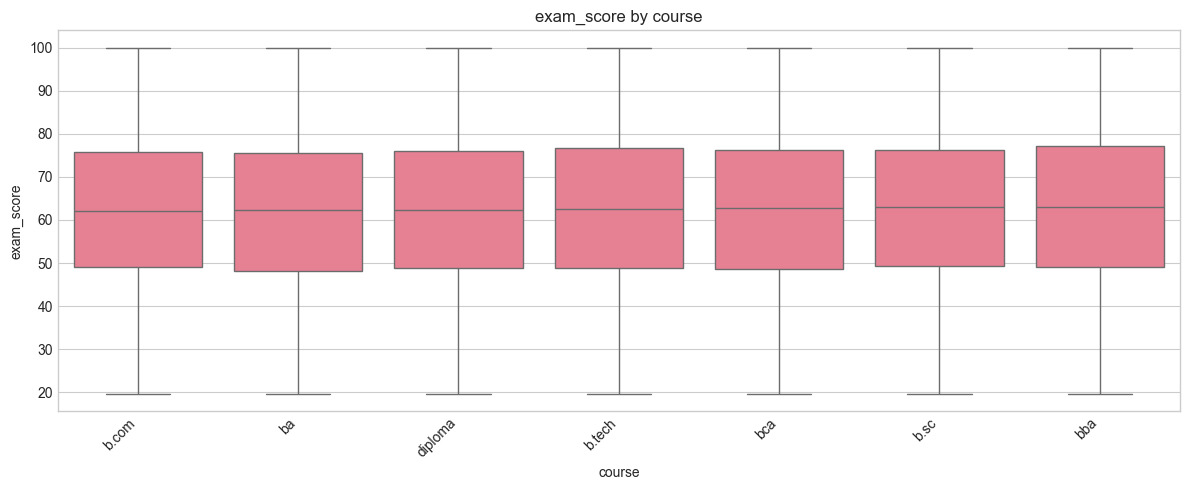


Mean exam_score by course:
              mean  median  count
course                           
bba      62.928127   63.10   2836
b.sc     62.718993   63.10   2878
b.tech   62.653529   62.60   2798
bca      62.524078   62.80   2902
b.com    62.333197   62.15   2864
diploma  62.330633   62.30   2826
ba       62.112214   62.30   2896



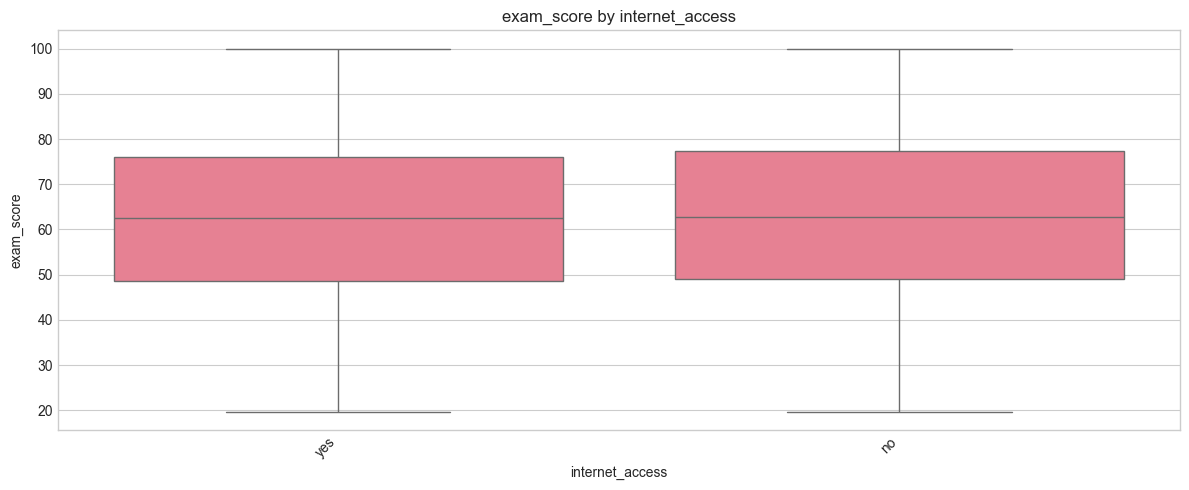


Mean exam_score by internet_access:
                      mean  median  count
internet_access                          
no               62.864663   62.65   3012
yes              62.450914   62.60  16988



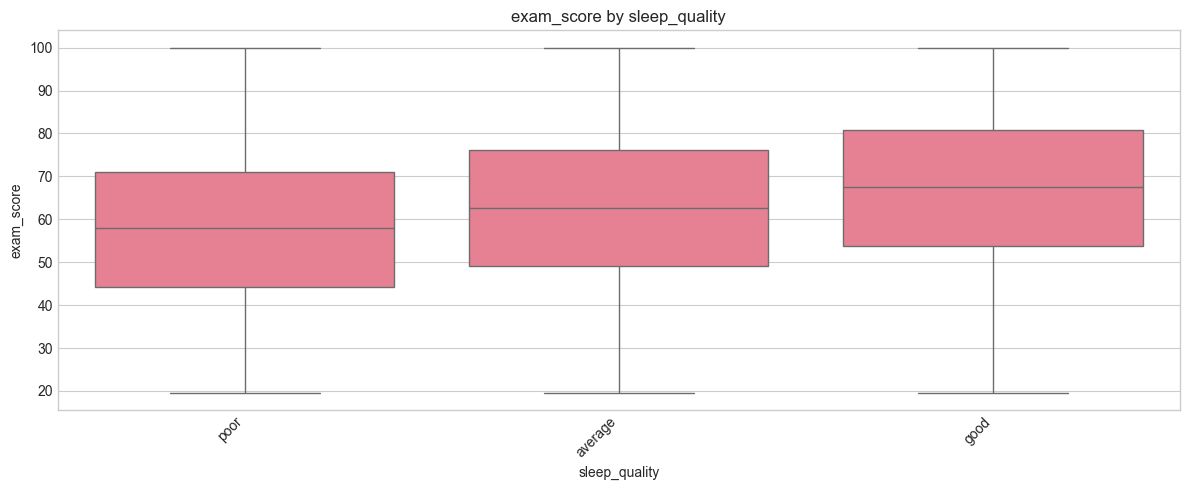


Mean exam_score by sleep_quality:
                    mean  median  count
sleep_quality                          
good           67.138598   67.60   6619
average        62.530512   62.65   6694
poor           57.917582   58.00   6687



In [100]:
# Box plots: Target by categorical features
cat_cols_to_analyze = [col for col in categorical_cols if df[col].nunique() <= 8]

if cat_cols_to_analyze:
    for col in cat_cols_to_analyze[:4]:  # Limit to first 4 for readability
        plt.figure(figsize=(12, 5))
        
        # Order by median target value
        order = df.groupby(col)[TARGET].median().sort_values().index
        
        sns.boxplot(data=df, x=col, y=TARGET, order=order)
        plt.title(f'{TARGET} by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Show mean target by category
        print(f"\nMean {TARGET} by {col}:")
        print(df.groupby(col)[TARGET].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))
        print("\n" + "="*50)
else:
    print("No suitable categorical columns for this analysis.")

### 4.4 Correlation Analysis

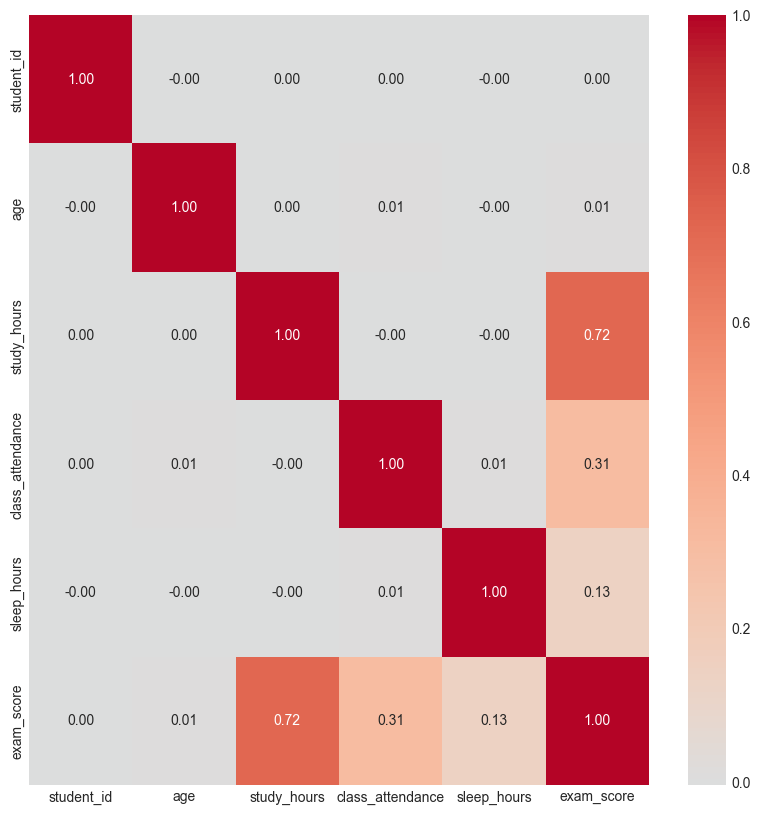

In [102]:
# TODO: Create and visualize a correlation matrix
#
# Steps:
# 1. Create a list of columns: numerical_cols + [TARGET]
# 2. Calculate the correlation matrix: df[columns].corr()
# 3. Create a heatmap using sns.heatmap()
#
# Heatmap parameters to use:
# - annot=True (show numbers)
# - cmap='coolwarm' (color scheme)
# - center=0 (center colormap at 0)
# - fmt='.2f' (2 decimal places)
#
# Store the correlation matrix in: correlation_matrix

# YOUR CODE HERE:
columns_list = numerical_cols + ['exam_score']

correlation_matrix = df[columns_list].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f'
)

plt.show()

In [103]:
# TODO: Extract and analyze correlations with the target variable
#
# Steps:
# 1. Get the TARGET column from correlation_matrix
# 2. Drop the TARGET's correlation with itself (it's always 1.0)
# 3. Sort values in descending order
# 4. Print the correlations
# 5. Identify strong correlations (absolute value > 0.5)
#
# Store result in: target_correlations

# YOUR CODE HERE:

target_correlations = correlation_matrix['exam_score']

target_correlations = target_correlations.drop('exam_score')

target_correlations = target_correlations.sort_values(ascending=False)

print("Correlations with target:")
print(target_correlations)

strong_correlations = target_correlations[abs(target_correlations) > 0.5]

print('Strong correlations:')
print(strong_correlations)

Correlations with target:
study_hours         0.717788
class_attendance    0.308850
sleep_hours         0.133222
age                 0.006522
student_id          0.003269
Name: exam_score, dtype: float64
Strong correlations:
study_hours    0.717788
Name: exam_score, dtype: float64


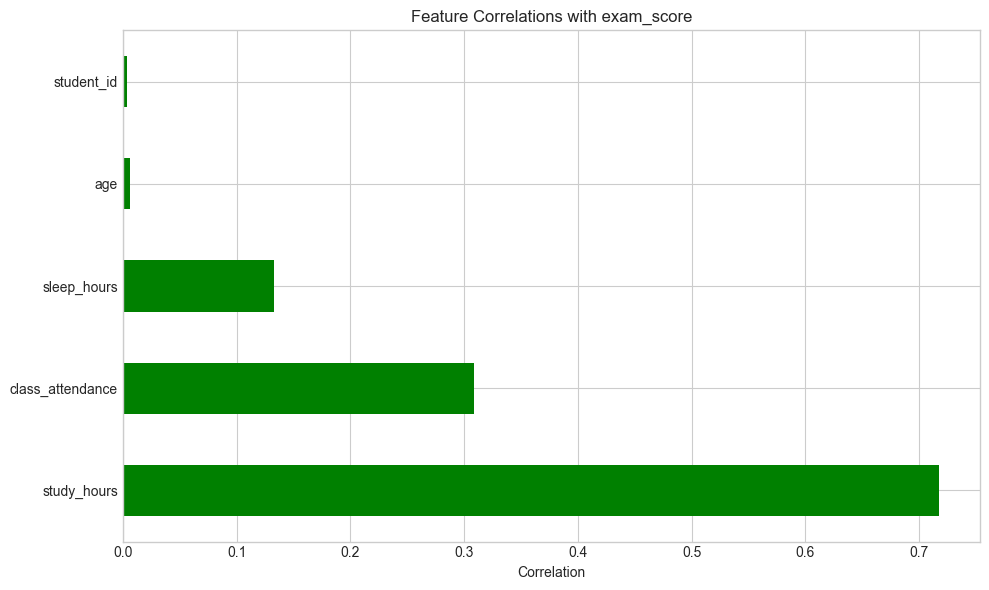

In [104]:
# Visualize correlations with target
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in target_correlations]
target_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation')
plt.title(f'Feature Correlations with {TARGET}')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### 4.5 Feature vs Target Relationships

*Create scatter plots for your most promising numerical features against the target.*

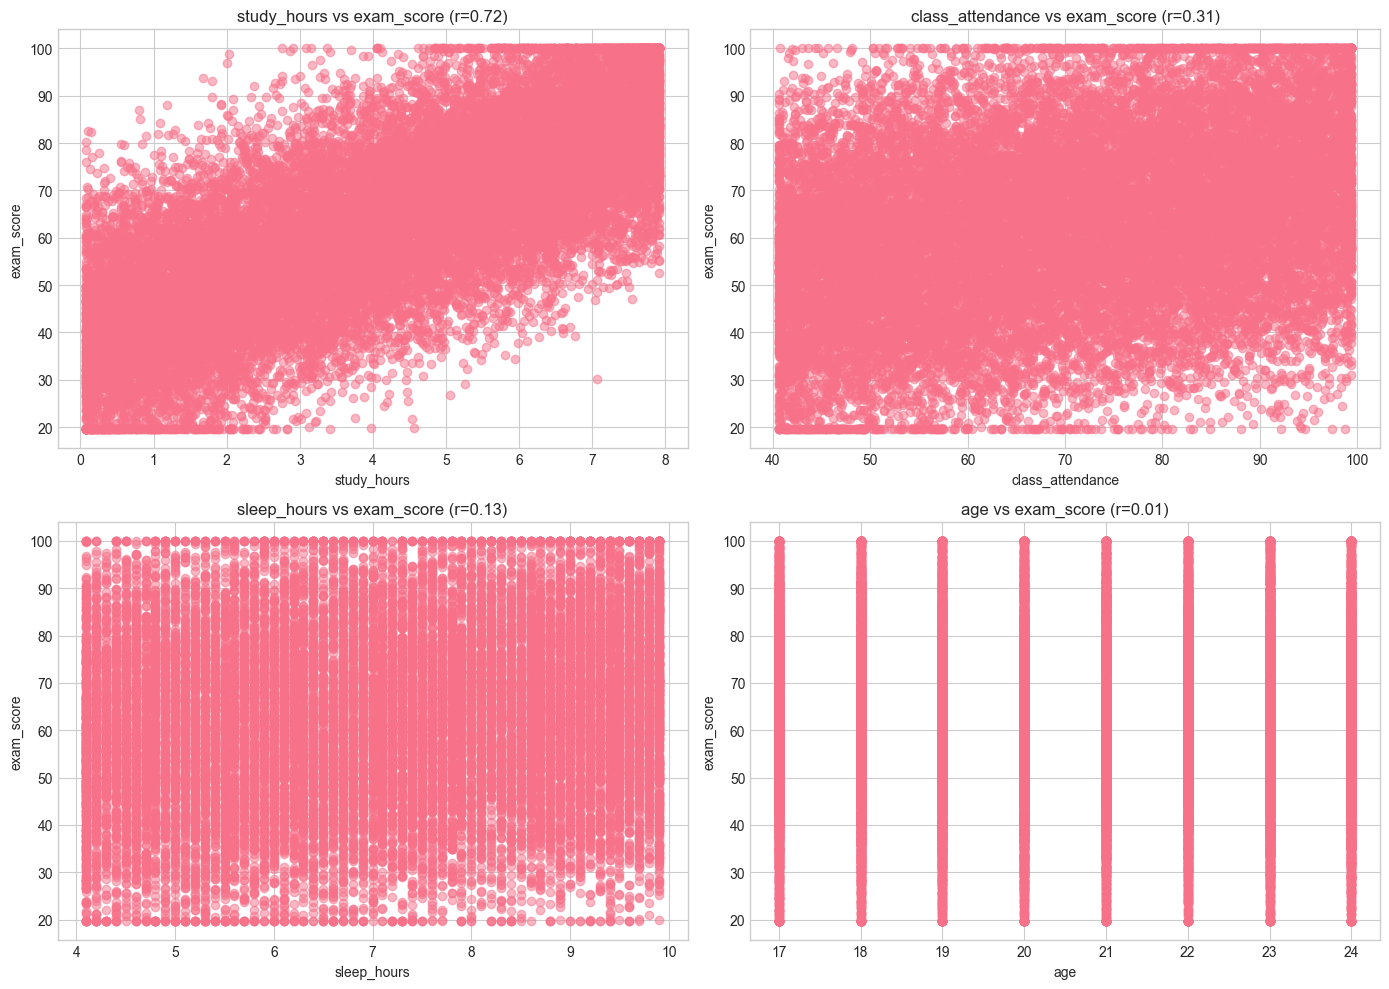

In [105]:
# Select top correlated features to plot
top_features = target_correlations.abs().sort_values(ascending=False).head(4).index.tolist()

if len(top_features) > 0:
    n_features = min(4, len(top_features))
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, feature in enumerate(top_features[:n_features]):
        axes[i].scatter(df[feature], df[TARGET], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(TARGET)
        corr = df[feature].corr(df[TARGET])
        axes[i].set_title(f'{feature} vs {TARGET} (r={corr:.2f})')

    # Hide unused subplots
    for j in range(n_features, 4):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features to plot.")

### 4.6 Additional Exploration (Your Choice!)

The sections above provide a foundation, but every dataset is unique. Use the cells below to explore additional aspects of YOUR data that you think are important.

**Ideas for additional exploration:**
- Violin plots for categorical vs target (shows distribution shape)
- Look at feature interactions (e.g., does the relationship between X and Y change based on Z?)
- Explore geographic patterns (if you have location data)
- Create pair plots for key features (`sns.pairplot()`)
- Analyze distributions across different subgroups
- Look for data quality issues specific to your dataset
- Check for nonsensical values (negative prices, impossible ages, etc.)

**Remember:** The best insights often come from curiosity-driven exploration, not just following a template. What questions do YOU have about your data?

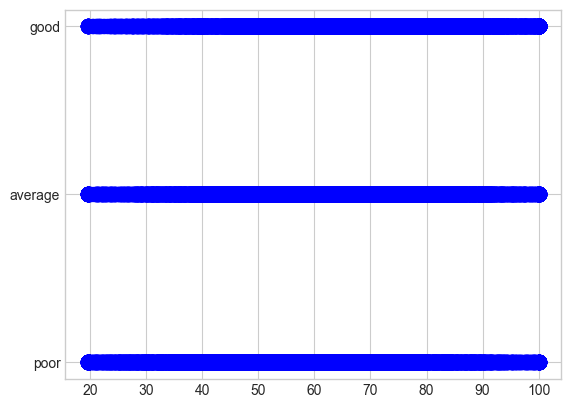

In [106]:
# YOUR ADDITIONAL EDA CODE HERE
# Add as many cells as you need - don't be limited by this template!

plt.scatter(
    df['exam_score'], 
    df['sleep_quality'], 
    color='blue', 
    s=100
)

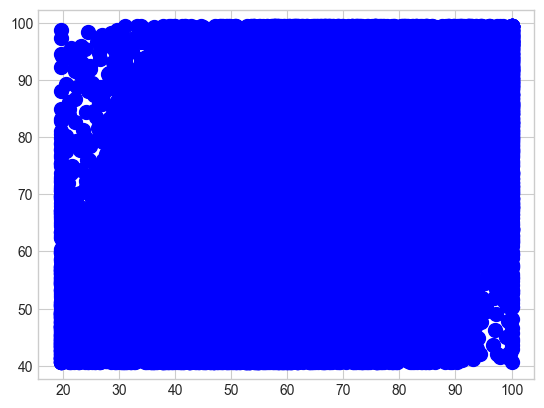

In [107]:
plt.scatter(
    df['exam_score'], 
    df['class_attendance'], 
    color='blue', 
    s=100
)


**What additional insights did you discover?**

not sure, didnt feel like i got any definable relationships

### 4.7 EDA Insights Summary

*Summarize your key findings from the EDA.*

**Questions to answer:**
- Which features are most correlated with your target?b

study hours had the highest correlation but class attendance was pretty high as well
- Which categorical features show the biggest differences in target?

intenet access
- Are there any features that seem unimportant?

age and student id for numerical
- Did you discover any interesting patterns or relationships?

age was a surprise, i thought the older you were the more focused you would be
- Are there any concerns about the data (outliers, skewness, etc.)?

no


## Section 5: Data Cleaning

### 5.1 Decide What to Drop

Before cleaning, decide which columns to remove entirely.

In [108]:
# TODO: Create a copy of your dataframe for cleaning
#
# Why? We want to preserve the original data in case we need to go back.
# Never modify your original dataframe directly!
#
# Store in: df_clean

# YOUR CODE HERE:

df_clean = df.copy()



print(f"Starting shape: {df_clean.shape}")

Starting shape: (20000, 13)


In [110]:
# Drop columns
# TODO: Decide which columns to drop based on the analysis above
# IMPORTANT: Don't just copy all suggestions - think about each one!

columns_to_drop = [
    # Add column names to drop here, e.g.:
    # 'id',
    # 'url',
    'gender',
    'course',
    'internet_access',
    'student_id',
    'study_method',
    'facility_rating',
]

if columns_to_drop:
    df_clean = df_clean.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")
    print(f"New shape: {df_clean.shape}")
else:
    print("No columns dropped. Update the list above if needed.")

Dropped 6 columns: ['gender', 'course', 'internet_access', 'student_id', 'study_method', 'facility_rating']
New shape: (20000, 7)


**Explain which columns you dropped and why:**

these had bad correlation with exam score

### 5.2 Handle Duplicate Rows

In [111]:
# TODO: Remove duplicate rows from df_clean
#
# Steps:
# 1. Store the row count before: len(df_clean)
# 2. Use df_clean.drop_duplicates() to remove duplicates (assign back to df_clean)
# 3. Store the row count after
# 4. Print how many duplicates were removed

# YOUR CODE HERE:
rows_before = len(df_clean)

df_clean = df_clean.drop_duplicates()

rows_after = len(df_clean)

duplicates_removed = rows_before - rows_after
print(f"Duplicates removed: {duplicates_removed}")
print(f"Rows before: {rows_before}")
print(f"Rows after: {rows_after}")

Duplicates removed: 0
Rows before: 20000
Rows after: 20000


### 5.3 Handle Missing Values

In [112]:
# Check missing values in cleaned dataframe
print("Missing values before handling:")
missing_now = df_clean.isnull().sum()
missing_now = missing_now[missing_now > 0].sort_values(ascending=False)
print(missing_now)

Missing values before handling:
Series([], dtype: int64)


In [119]:
# Handle missing values
# TODO: Add your missing value handling code here
# 
# STRATEGIES:
# - Numerical columns: use median (robust to outliers) or mean
# - Categorical columns: use mode or 'Unknown'
# - Drop rows if missing target variable
#
# Examples:
# df_clean['column'] = df_clean['column'].fillna(df_clean['column'].median())
# df_clean['column'] = df_clean['column'].fillna('Unknown')
# df_clean = df_clean.dropna(subset=[TARGET])  # Don't predict with missing target!

# YOUR CODE HERE:

#drop rows where data is missing, can do this since as a double check since earlier work verified there were no missing values

df_clean = df_clean.dropna()

#assign a variable for numerical and categorical columns
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

#replace numerical values missing values with median
for col in numerical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

#replace object types with mode
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


In [121]:
# Verify missing values are handled
remaining_missing = df_clean.isnull().sum().sum()
print(f"Missing values after cleaning: {remaining_missing}")

if remaining_missing > 0:
    print("\n⚠️ Still have missing values in:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Missing values after cleaning: 0


**Explain your missing value strategy:**

i replaced numerical values with median since mode could skew the number if there were high outliers, for categorical columns i replaced it with the most common number

### 5.4 Handle Outliers (if needed)

In [122]:
# Check for outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    return n_outliers, lower_bound, upper_bound

# Get current numerical columns
current_numerical = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print("Outlier analysis:")
print("="*60)
for col in current_numerical:
    n_outliers, lower, upper = find_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        pct = n_outliers / len(df_clean) * 100
        print(f"{col}: {n_outliers:,} outliers ({pct:.1f}%) | bounds: [{lower:.2f}, {upper:.2f}]")

Outlier analysis:


In [123]:
# Handle outliers (if needed)
# TODO: Add your outlier handling code here if needed
#
# STRATEGIES:
# - Remove rows with outliers (be careful - losing data)
# - Cap/clip values at bounds
# - Keep them (if they're valid data points)
#
# Examples:
# df_clean = df_clean[df_clean['price'] > 0]  # Remove invalid prices
# df_clean = df_clean[df_clean['price'] < 500000]  # Remove extreme prices
# df_clean['column'] = df_clean['column'].clip(lower=0, upper=upper_bound)

# YOUR CODE HERE:

#not needed


**Explain your outlier handling strategy (or why you kept them):**

didnt do anything since there were no outliers

### 5.5 Data Type Corrections

In [124]:
# Check current data types
print("Current data types:")
print(df_clean.dtypes)

Current data types:
age                   int64
study_hours         float64
class_attendance    float64
sleep_hours         float64
sleep_quality           str
exam_difficulty         str
exam_score          float64
dtype: object


In [125]:
# Fix any data type issues
# TODO: Add your data type corrections here if needed
#
# Examples:
# df_clean['year'] = df_clean['year'].astype(int)
# df_clean['date_column'] = pd.to_datetime(df_clean['date_column'])
# df_clean['category'] = df_clean['category'].astype('category')

# YOUR CODE HERE:

#this is not needed

## Section 6: Feature Engineering

Feature engineering is where you can really add value! The sections below cover common techniques, but feel free to go beyond these basics.

### 6.1 Create New Features (if applicable)

**Common feature engineering techniques:**
- **Ratios/interactions:** Combine existing features (e.g., price per square foot)
- **Log transforms:** Reduce skewness in highly skewed features
- **Binning:** Convert continuous variables to categories
- **Text features:** Extract length, word counts, etc. from text
- **Domain-specific:** Features that make sense for your specific problem

Think about what would help YOUR specific prediction problem!

In [126]:
# Create new features
# TODO: Add your feature engineering code here
#
# Examples:
# df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft']
# df_clean['log_price'] = np.log1p(df_clean['price'])
# df_clean['age'] = 2026 - df_clean['year']

# YOUR CODE HERE:

#these are not needed

**Explain your new features:**

i already have a diverse set of data that cant really be combined together or expanded upon with current data

### 6.2 Encode Categorical Variables

In [128]:
# TODO: Identify categorical columns that need encoding
#
# Steps:
# 1. Get categorical columns using select_dtypes(include=['object', 'category'])
# 2. For each column, print:
#    - Column name
#    - Number of unique values: .nunique()
#    - Recommendation: "one-hot encoding" if <= 10 unique, else "consider label encoding or dropping"
#
# Store in: cat_cols

# YOUR CODE HERE:

#selects all categorical columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

#uses a for statement to identify the number of unique values and decides if they should be one hot encoded or not
for col in cat_cols:
    unique_vals = df_clean[col].nunique()
    
    if unique_vals <= 10:
        recommendation = "one-hot encoding"
    else:
        recommendation = "dont one hot encode"
    
    print(f"Column: {col}")
    print(f"  Unique values: {unique_vals}")
    print(f"  Recommendation: {recommendation}\n")


Column: sleep_quality
  Unique values: 3
  Recommendation: one-hot encoding

Column: exam_difficulty
  Unique values: 3
  Recommendation: one-hot encoding



In [129]:
# Encode categorical variables
# TODO: Add your encoding code here
#
# STRATEGIES:
# - One-hot encoding: for low cardinality (< 10 unique values)
# - Label encoding: for ordinal data or high cardinality
# - Target encoding: advanced technique (be careful of data leakage)
#
# Examples:
# One-hot encoding:
# df_clean = pd.get_dummies(df_clean, columns=['category_col'], drop_first=True)
#
# Label encoding:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_clean['encoded_col'] = le.fit_transform(df_clean['category_col'])

# YOUR CODE HERE:

cat_cols = df_clean.select_dtypes(include=['object']).columns

df_clean = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

**Explain your encoding strategy:**

i selected object dtypes and one hot encoded them

### 6.3 Additional Feature Engineering (Your Choice!)

Every dataset has unique opportunities for feature engineering. What else makes sense for YOUR data?

**Think about:**
- What domain knowledge can you apply?
- Are there any feature interactions that might be predictive?
- Can you create meaningful groups or categories?
- Would polynomial features help capture non-linear relationships?

In [ ]:
# YOUR ADDITIONAL FEATURE ENGINEERING CODE HERE
# Add as many cells as you need!

#cant think of any additional features

**Explain your additional feature engineering:**

cant think of any additional features

### 6.4 Feature Scaling (Preparation)

We'll do actual scaling in the modeling notebook, but let's check which features might need it.

In [134]:
# TODO: Identify numerical features and check their ranges
#
# Steps:
# 1. Get numerical columns from df_clean (excluding TARGET)
# 2. For each column, print the min, max, and range
#
# This helps you understand if features need scaling (different scales = need scaling)
#
# Store in: numerical_features

# YOUR CODE HERE:
numerical_features = df_clean.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('exam_score')

for col in numerical_features:
    col_min = df_clean[col].min()
    col_max = df_clean[col].max()
    col_range = col_max - col_min
    
    print(f"{col}")
    print(f"  Min:   {col_min}")
    print(f"  Max:   {col_max}")
    print(f"  Range: {col_range}")
    print("-" * 10)

age
  Min:   17
  Max:   24
  Range: 7
----------
study_hours
  Min:   0.08
  Max:   7.91
  Range: 7.83
----------
class_attendance
  Min:   40.6
  Max:   99.4
  Range: 58.800000000000004
----------
sleep_hours
  Min:   4.1
  Max:   9.9
  Range: 5.800000000000001
----------


### 6.5 Final Sanity Checks

In [135]:
# Final data quality checks before saving
print("="*60)
print("FINAL DATA QUALITY CHECKS")
print("="*60)

print(f"\n1. Shape: {df_clean.shape[0]:,} rows, {df_clean.shape[1]} columns")
print(f"   (Started with {df.shape[0]:,} rows, {df.shape[1]} columns)")

print(f"\n2. Missing values: {df_clean.isnull().sum().sum()}")

print(f"\n3. Duplicate rows: {df_clean.duplicated().sum()}")

print(f"\n4. Target variable '{TARGET}':")
print(f"   - Min: {df_clean[TARGET].min():.2f}")
print(f"   - Max: {df_clean[TARGET].max():.2f}")
print(f"   - Mean: {df_clean[TARGET].mean():.2f}")

# Check for data leakage red flags
print(f"\n5. Data types:")
print(f"   - Numerical: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical: {len(df_clean.select_dtypes(include=['object', 'category']).columns)}")

remaining_cats = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
if remaining_cats:
    print(f"\n⚠️ Still have categorical columns: {remaining_cats}")
    print("   Make sure these are encoded before modeling!")
else:
    print("\n✓ All features are numerical. Ready for modeling!")

FINAL DATA QUALITY CHECKS

1. Shape: 20,000 rows, 9 columns
   (Started with 20,000 rows, 13 columns)

2. Missing values: 0

3. Duplicate rows: 0

4. Target variable 'exam_score':
   - Min: 19.60
   - Max: 100.00
   - Mean: 62.51

5. Data types:
   - Numerical: 5
   - Categorical: 0

✓ All features are numerical. Ready for modeling!


### 6.6 Save Processed Data

In [136]:
# Final check of cleaned data
print("Final cleaned dataset:")
print(f"Shape: {df_clean.shape}")
print(f"\nColumns ({len(df_clean.columns)}):")
print(df_clean.columns.tolist())
print(f"\nData types:")
print(df_clean.dtypes)

Final cleaned dataset:
Shape: (20000, 9)

Columns (9):
['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score', 'sleep_quality_good', 'sleep_quality_poor', 'exam_difficulty_hard', 'exam_difficulty_moderate']

Data types:
age                           int64
study_hours                 float64
class_attendance            float64
sleep_hours                 float64
exam_score                  float64
sleep_quality_good             bool
sleep_quality_poor             bool
exam_difficulty_hard           bool
exam_difficulty_moderate       bool
dtype: object


In [137]:
# Save cleaned data
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False)
print("✓ Cleaned data saved to ../data/processed/cleaned_data.csv")

✓ Cleaned data saved to ../data/processed/cleaned_data.csv


### 6.7 Feature Engineering Summary

*Summarize all the data cleaning and feature engineering you performed.*

**Checklist:**
- [ ] Columns dropped (with justification)
- [ ] Duplicate rows removed
- [ ] Missing values handled
- [ ] Outliers addressed (or documented why not)
- [ ] Data types corrected
- [ ] New features created (if applicable)
- [ ] Categorical variables encoded
- [ ] Data saved to processed folder

**Summary of changes:**

-i dropped gender,course,internet access,student id,study method,and facility rating.  they didnt seem like they had bearing
-didnt need to remove any duplicate rows since there were none
-didnt have any missing values
-didnt have any outliers
-didnt have any data types created
-with the available features i already had there wasnt anything new i could create that would benefit my target
-i encoded 2 values, sleep quality and exam difficulty, these were one hot encoded
-data was saved

**Final feature list for modeling:**

age, study hours, class attendance, sleep hours, sleep quality, exam difficulty

---

## ✅ Checkpoint 2 Submission Instructions

**Congratulations!** You've completed Checkpoint 2 (EDA, Data Cleaning, and Feature Engineering).

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub

```bash
# Stage your changes
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/processed/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 2: EDA, data cleaning, and feature engineering"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 2 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

You're ready to move on to **Notebook 02: Regression Model**!

In that notebook, you'll:
1. Load your cleaned data
2. Split into train/test sets
3. Build and evaluate regression models
4. Save your best model

---